In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn import ensemble

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
# Чтение CSV файла в DataFrame
df = pd.read_csv('Fraud.csv')

In [3]:
display(df)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
246943,14,PAYMENT,4006.96,C935603188,0.0,0.00,M1278530331,0.0,0.0,0.0,0.0
246944,14,PAYMENT,12343.00,C91894559,0.0,0.00,M1608923559,0.0,0.0,0.0,0.0
246945,14,PAYMENT,12838.82,C1240146468,0.0,0.00,M590191625,0.0,0.0,0.0,0.0
246946,14,PAYMENT,1322.31,C1998299576,0.0,0.00,M425625085,0.0,0.0,0.0,0.0


In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246947 entries, 0 to 246946
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            246947 non-null  int64  
 1   type            246947 non-null  object 
 2   amount          246947 non-null  float64
 3   nameOrig        246947 non-null  object 
 4   oldbalanceOrg   246947 non-null  float64
 5   newbalanceOrig  246947 non-null  float64
 6   nameDest        246947 non-null  object 
 7   oldbalanceDest  246947 non-null  float64
 8   newbalanceDest  246947 non-null  float64
 9   isFraud         246947 non-null  float64
 10  isFlaggedFraud  246947 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 22.6+ MB


In [6]:
round(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest',]].describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
step,246947.0,10.734,2.366,1.0,9.00,11.00,13.000,14.00
amount,246947.0,179432.291,316595.130,0.3,12410.63,73877.81,231664.440,10000000.00
oldbalanceOrg,246947.0,884718.774,2822049.870,0.0,0.00,18824.00,184294.590,38939424.03
newbalanceOrig,246947.0,903184.520,2859473.369,0.0,0.00,0.00,222798.905,38946233.02
oldbalanceDest,246947.0,958179.462,2369456.109,0.0,0.00,64485.11,812023.585,41338441.34
newbalanceDest,246947.0,1193713.745,2621727.333,0.0,0.00,161677.20,1218323.675,41383645.15


Доля мошеннических транзакций: 0.0006519617569761933


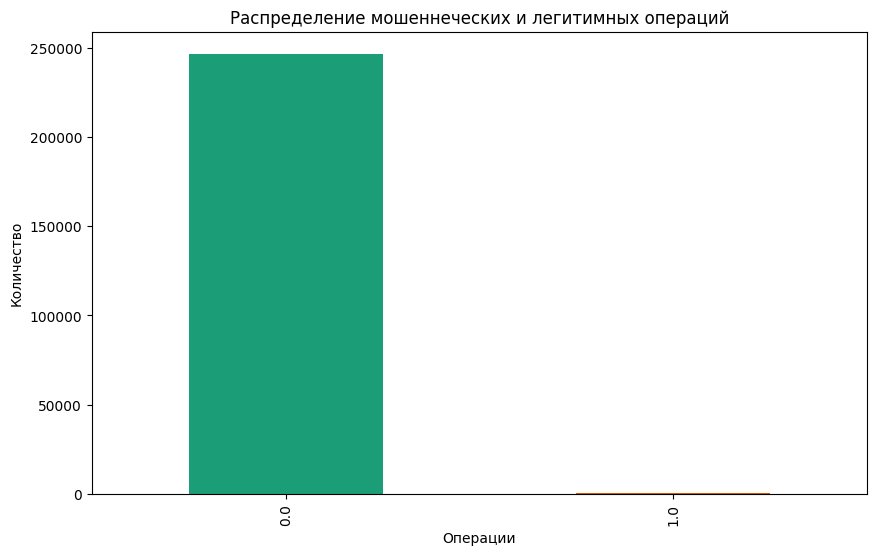

In [7]:
# Доля мошеннеческих операций
print('Доля мошеннических транзакций:', df['isFraud'].mean())

# Количество мошеннических и легетимных операций
plt.figure(figsize=(10, 6))
df['isFraud'].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Распределение мошеннеческих и легитимных операций')
plt.xlabel('Операции')
plt.ylabel('Количество')
plt.show()

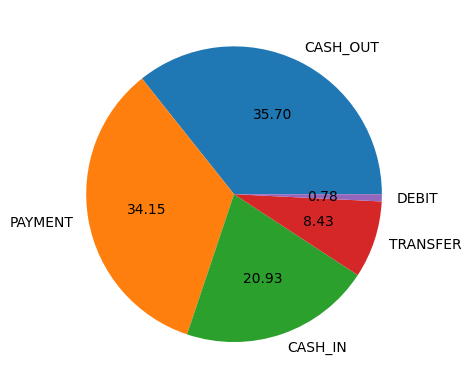

In [8]:
# Количество операций по типам
plt.pie(x = df['type'].value_counts(), autopct = '%.2f', labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()


In [9]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,246786
1.0,161


                df      sum_sq   mean_sq           F        PR(>F)
C(type)        4.0    0.274506  0.068627  105.508252  5.761695e-90
Residual  246942.0  160.620528  0.000650         NaN           NaN


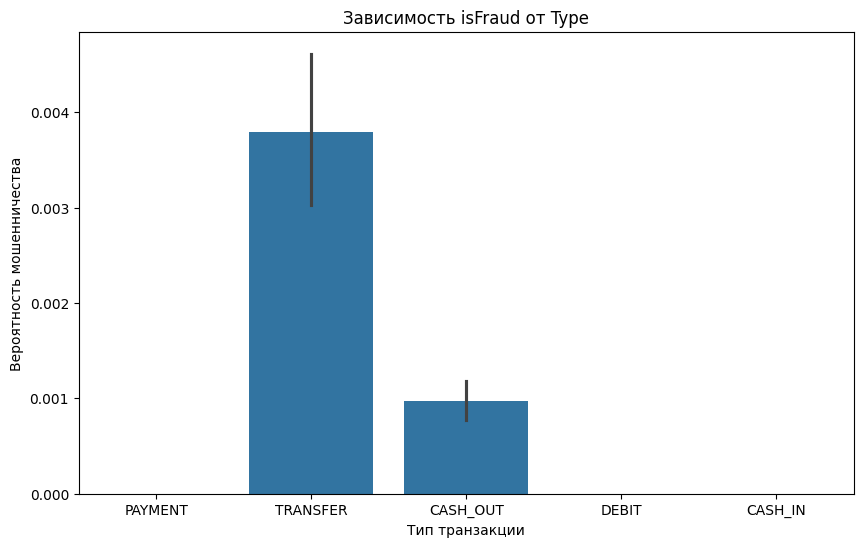

In [10]:
# Анализ зависимости между Type и isFraud
model = ols('isFraud ~ C(type)', data=df).fit()
anova_results = anova_lm(model)
print(anova_results)

# Визуализация зависимости
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='isFraud', data=df)
plt.title('Зависимость isFraud от Type')
plt.xlabel('Тип транзакции')
plt.ylabel('Вероятность мошенничества')
plt.show()

In [11]:
df['type'].value_counts()

,count
type,
PAYMENT,88161
CASH_OUT,84338
CASH_IN,51690
TRANSFER,20821
DEBIT,1937


**Как видим, все мошеннические операции связаны только с переводами и снятием наличных**

In [12]:
df.loc[(df['type'] == 'CASH_OUT') & (df['isFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1.0,0.0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1.0,0.0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1.0,0.0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1.0,0.0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
204216,13,CASH_OUT,2686564.04,C901331326,2686564.04,0.0,C1662761228,438199.37,3124763.41,1.0,0.0
217321,13,CASH_OUT,6188514.81,C686187434,6188514.81,0.0,C1562904239,381607.21,6424681.56,1.0,0.0
222998,14,CASH_OUT,2093951.47,C1440901488,2093951.47,0.0,C166839225,0.00,2093951.47,1.0,0.0
241948,14,CASH_OUT,143032.00,C465166521,143032.00,0.0,C487776685,814654.61,1020323.73,1.0,0.0


In [13]:
df.loc[(df['type'] == 'TRANSFER') & (df['isFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1.0,0.0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1.0,0.0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.00,0.00,1.0,0.0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.00,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
217320,13,TRANSFER,6188514.81,C135832352,6188514.81,0.0,C2009346140,0.00,0.00,1.0,0.0
217978,13,TRANSFER,123194.95,C2143112877,79466.45,0.0,C1755380031,535933.16,263908.84,1.0,0.0
222997,14,TRANSFER,2093951.47,C1374377088,2093951.47,0.0,C207611232,0.00,0.00,1.0,0.0
241947,14,TRANSFER,143032.00,C1960144830,143032.00,0.0,C801162238,0.00,0.00,1.0,0.0


In [14]:
df['nameOrig'].value_counts()

,count
nameOrig,
C199116739,2
C189326840,2
C44568807,2
C1842781381,2
C779875094,2
...,...
C1797060528,1
C60451366,1
C27725306,1


**Каждое значение в столбце nameOrig уникально**

In [15]:
df['nameDest'].value_counts()

,count
nameDest,
C985934102,84
C1286084959,83
C248609774,78
C2083562754,77
C1590550415,75
...,...
M1709447837,1
M1828916311,1
M3817210,1


<Figure size 800x600 with 0 Axes>

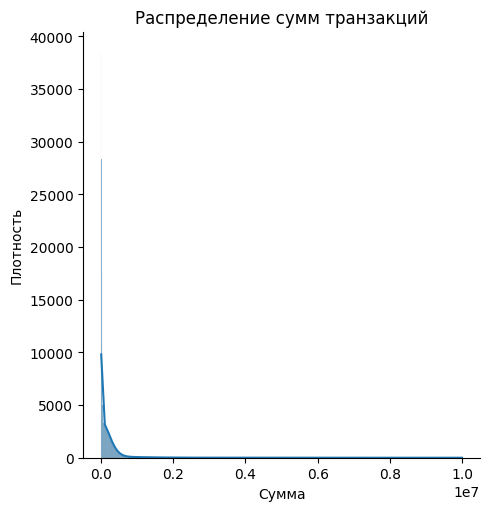

In [16]:
plt.figure(figsize=(8, 6))
sns.displot(df['amount'], kde=True)
plt.title('Распределение сумм транзакций')
plt.xlabel('Сумма')
plt.ylabel('Плотность')
plt.show()

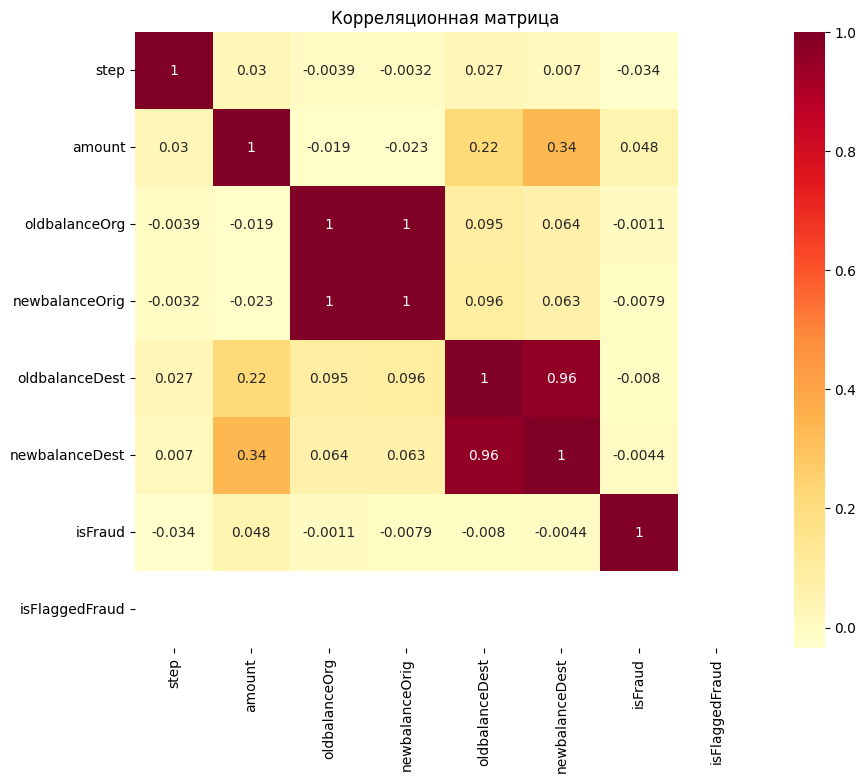

In [17]:
# Корреляционный анализ
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица')
plt.show()

**Среди численных данных наибольшая зависимость типа операции по критерию мошенничества (isFraud) наблюдается от суммы операции (amount)**


In [18]:
df=df.drop({'nameOrig','nameDest'},axis=1)

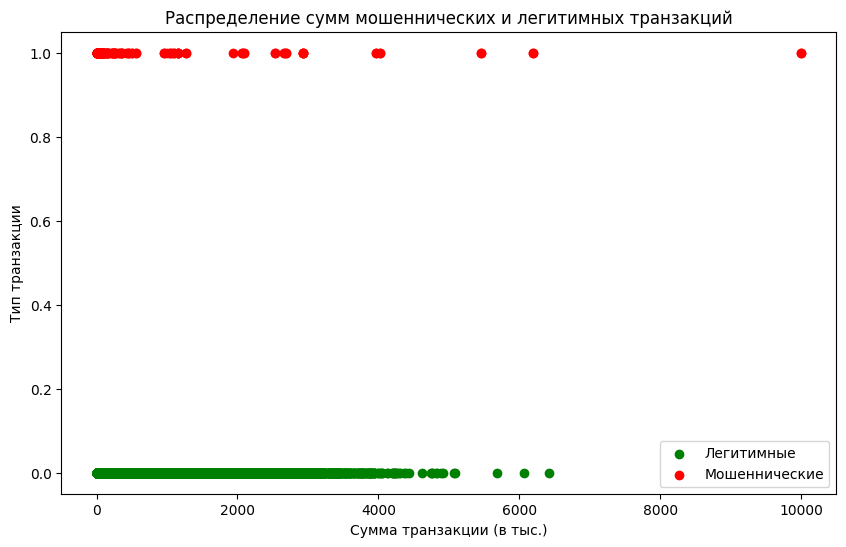

In [19]:
plt.figure(figsize=(10, 6))
df_legit = df[df['isFraud'] == 0]
df_fraud = df[df['isFraud'] == 1]
plt.scatter(df_legit['amount'] / 1000, df_legit['isFraud'], c='green', label='Легитимные')
plt.scatter(df_fraud['amount'] / 1000, df_fraud['isFraud'], c='red', label='Мошеннические')
plt.xlabel('Сумма транзакции (в тыс.)')
plt.ylabel('Тип транзакции')
plt.title('Распределение сумм мошеннических и легитимных транзакций')
plt.legend()

In [20]:
df=df.drop({'newbalanceDest','newbalanceOrig'},axis=1)
display(df)

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,0.0,0.0,0.0
1,1,PAYMENT,1864.28,21249.00,0.0,0.0,0.0
2,1,TRANSFER,181.00,181.00,0.0,1.0,0.0
3,1,CASH_OUT,181.00,181.00,21182.0,1.0,0.0
4,1,PAYMENT,11668.14,41554.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
246942,14,PAYMENT,7297.62,4459.15,0.0,0.0,0.0
246943,14,PAYMENT,4006.96,0.00,0.0,0.0,0.0
246944,14,PAYMENT,12343.00,0.00,0.0,0.0,0.0
246945,14,PAYMENT,12838.82,0.00,0.0,0.0,0.0


In [21]:
column_names = ['type']
for i in column_names:
  df[i] = pd.factorize(df[i])[0]

In [22]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,170136.0,0.0,0.0,0.0
1,1,0,1864.28,21249.0,0.0,0.0,0.0
2,1,1,181.00,181.0,0.0,1.0,0.0
3,1,2,181.00,181.0,21182.0,1.0,0.0
4,1,0,11668.14,41554.0,0.0,0.0,0.0


<Axes: >

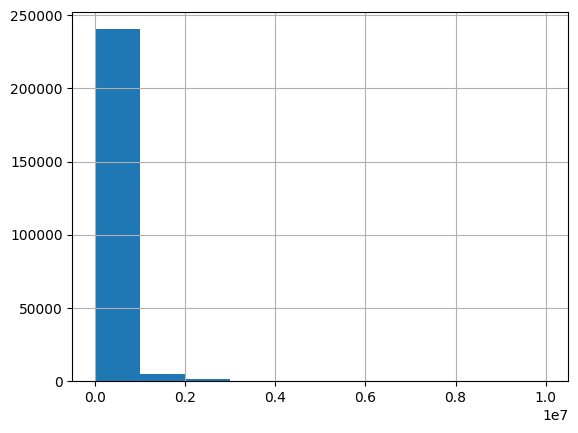

In [23]:
df['amount'].hist()

In [24]:
fraud = df[df['isFraud'] == 1]
safe = df[df['isFraud'] == 0]

(244691, 7)


<Axes: >

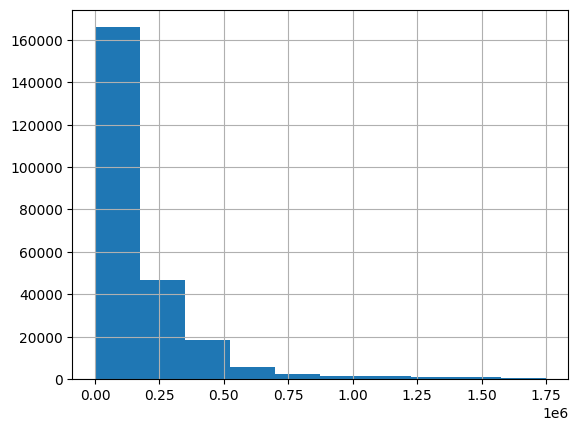

In [25]:
df = df[df['amount'] < 1.75e6] # оставим только те строки, где значение цены меньше 8 000 000
print(df.shape) # выведем размер отфильтрованного дата сета (кол-во строк, кол-во столбцов), как видим, количество строк сократится
df['amount'].hist() # построим диаграмму

In [26]:
print(safe.shape)
print(fraud.shape)

(246786, 7)
(161, 7)


In [27]:
safe=safe.sample(len(fraud))

In [28]:
print(safe.shape)
print(fraud.shape)

(161, 7)
(161, 7)


In [29]:
up_df=pd.concat([safe,fraud], axis=0)

In [30]:
up_df.shape

(322, 7)

In [31]:
y = up_df['isFraud']
X = up_df.drop(['isFraud'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [32]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(257, 6) (65, 6) (257,) (65,)


In [33]:
y_test.value_counts()

,count
isFraud,
0.0,33
1.0,32


In [34]:
y_train.value_counts()

,count
isFraud,
1.0,129
0.0,128


In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [48]:
df = pd.DataFrame(X_train_scaled)
df.to_csv('x_train.csv', index=False)

df = pd.DataFrame(X_test_scaled)
df.to_csv('x_test.csv', index=False)

df = pd.DataFrame(y_train)
df.to_csv('y_train.csv', index=False)

df = pd.DataFrame(y_test)
df.to_csv('y_test.csv', index=False)

In [97]:
model_metrics = []

Случайный лес:

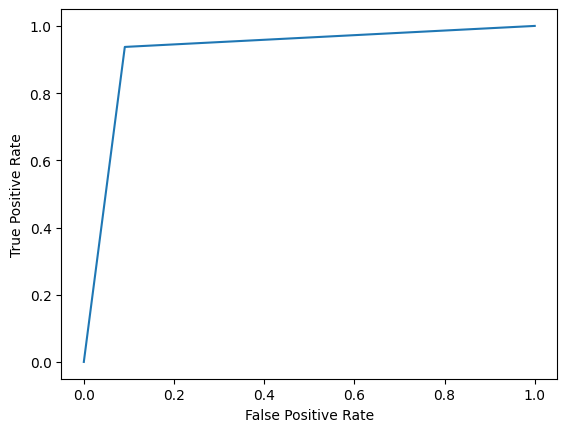

AUC: 0.923
0.9230769230769231
0.9375
0.9090909090909091
0.923076923076923


In [98]:
rf_model = ensemble.RandomForestClassifier(n_estimators=150)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC: %.3f" % auc)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
AUC1 = auc

model_metrics.append({
        'Model': "Random Forest",
        'Accuracy': Accuracy,
        'Precision': Precision,
        'Recall': Recall,
        'F1-score': F1,
        'AUC': AUC1
    })

Логистическая регрессия

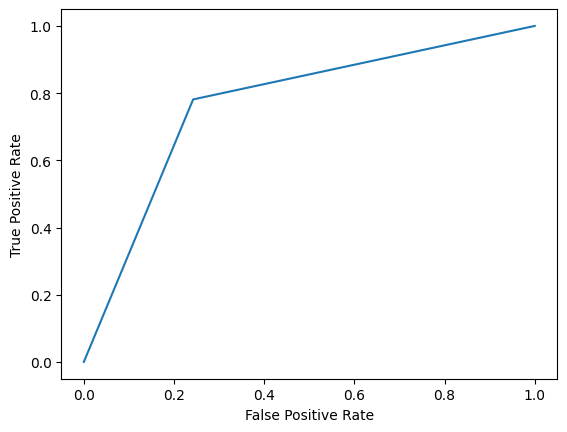

AUC: 0.769
0.7692307692307693
0.78125
0.7575757575757576
0.7692307692307692


In [99]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC: %.3f" % auc)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

Accuracy2 = accuracy_score(y_test, y_pred)
Precision2 = precision_score(y_test, y_pred)
Recall2 = recall_score(y_test, y_pred)
F12 = f1_score(y_test, y_pred)
AUC12 = auc

model_metrics.append({
        'Model': "Logistic Regression",
        'Accuracy': Accuracy2,
        'Precision': Precision2,
        'Recall': Recall2,
        'F1-score': F12,
        'AUC': AUC12
    })

Дерево решений:

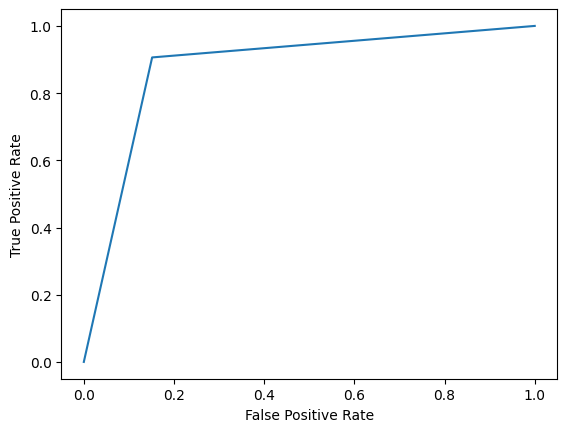

AUC: 0.877
0.8769230769230769
0.90625
0.8529411764705882
0.8787878787878787


In [100]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC: %.3f" % auc)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

Accuracy3 = accuracy_score(y_test, y_pred)
Precision3 = precision_score(y_test, y_pred)
Recall3 = recall_score(y_test, y_pred)
F13 = f1_score(y_test, y_pred)
AUC13 = auc

model_metrics.append({
        'Model': "Decision Tree",
        'Accuracy': Accuracy3,
        'Precision': Precision3,
        'Recall': Recall3,
        'F1-score': F13,
        'AUC': AUC13
    })

Гауссовский наивный байесовский классификатор:


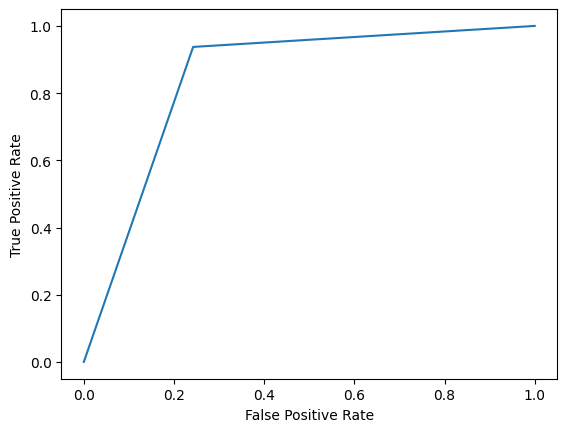

AUC: 0.848
0.8461538461538461
0.9375
0.7894736842105263
0.8571428571428572


In [101]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train_scaled, y_train)

y_pred = gaussian.predict(X_test_scaled)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC: %.3f" % auc)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

Accuracy4 = accuracy_score(y_test, y_pred)
Precision4 = precision_score(y_test, y_pred)
Recall4 = recall_score(y_test, y_pred)
F14 = f1_score(y_test, y_pred)
AUC14 = auc

model_metrics.append({
        'Model': "GaussianNB",
        'Accuracy': Accuracy4,
        'Precision': Precision4,
        'Recall': Recall4,
        'F1-score': F14,
        'AUC': AUC14
    })

Бернуллиевский наивный байесовский классификатор:



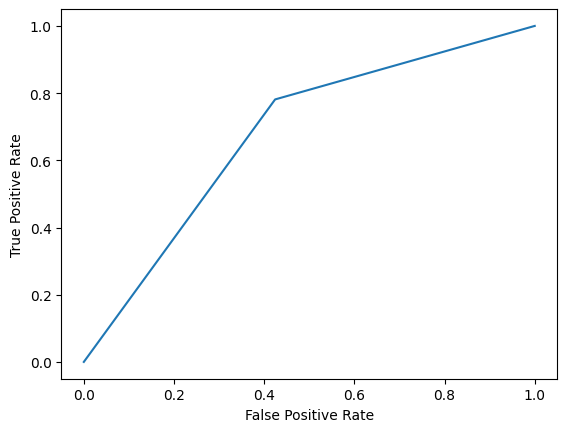

AUC: 0.679
0.676923076923077
0.78125
0.6410256410256411
0.7042253521126761


In [102]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score

bernoulli = BernoulliNB()
bernoulli.fit(X_train_scaled, y_train)
y_pred = bernoulli.predict(X_test_scaled)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC: %.3f" % auc)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

Accuracy5 = accuracy_score(y_test, y_pred)
Precision5 = precision_score(y_test, y_pred)
Recall5 = recall_score(y_test, y_pred)
F15 = f1_score(y_test, y_pred)
AUC15 = auc

model_metrics.append({
        'Model': "BernoulliNB",
        'Accuracy': Accuracy5,
        'Precision': Precision5,
        'Recall': Recall5,
        'F1-score': F15,
        'AUC': AUC15
    })

In [103]:
metrics_df = pd.DataFrame(model_metrics)
display(metrics_df)

,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Random Forest,0.923077,0.909091,0.93750,0.923077,0.923295
1,Logistic Regression,0.769231,0.757576,0.78125,0.769231,0.769413
2,Decision Tree,0.876923,0.852941,0.90625,0.878788,0.877367
3,GaussianNB,0.846154,0.789474,0.93750,0.857143,0.847538
4,BernoulliNB,0.676923,0.641026,0.78125,0.704225,0.678504


In [104]:
import pickle

pickle.dump(rf_model, open('model.pkl', 'wb'))

pickle.dump(ss, open('scaler.pkl', 'wb'))